In [272]:
import math
import random 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [273]:
# seeds: 13, 47, 50
rand_seed = 13 

# number of nodes I want in graph
n = 50

# the base of the probality that an edge is present between two vertices: base ** (-dist)
base = 750

In [274]:
random.seed(rand_seed) # Must be in the same code chunk as when I am doing the randomness

G = nx.Graph()
x_axis = {}
y_axis = {}
for i in range(0, n):
    x_axis[i] = round(random.random(), 3)
    y_axis[i] = round(random.random(), 3)
    G.add_node(i)

nx.set_node_attributes(G, x_axis, name='x_axis')
nx.set_node_attributes(G, y_axis, name='y_axis')

In [275]:
G.nodes().data()

NodeDataView({0: {'x_axis': 0.259, 'y_axis': 0.685}, 1: {'x_axis': 0.684, 'y_axis': 0.849}, 2: {'x_axis': 0.186, 'y_axis': 0.231}, 3: {'x_axis': 0.147, 'y_axis': 0.225}, 4: {'x_axis': 0.734, 'y_axis': 0.13}, 5: {'x_axis': 0.531, 'y_axis': 0.214}, 6: {'x_axis': 0.295, 'y_axis': 0.432}, 7: {'x_axis': 0.838, 'y_axis': 0.608}, 8: {'x_axis': 0.014, 'y_axis': 0.276}, 9: {'x_axis': 0.147, 'y_axis': 0.871}, 10: {'x_axis': 0.81, 'y_axis': 0.806}, 11: {'x_axis': 0.826, 'y_axis': 0.745}, 12: {'x_axis': 0.949, 'y_axis': 0.794}, 13: {'x_axis': 0.257, 'y_axis': 0.85}, 14: {'x_axis': 0.487, 'y_axis': 0.755}, 15: {'x_axis': 0.564, 'y_axis': 0.43}, 16: {'x_axis': 0.364, 'y_axis': 0.43}, 17: {'x_axis': 0.314, 'y_axis': 0.117}, 18: {'x_axis': 0.82, 'y_axis': 0.798}, 19: {'x_axis': 0.986, 'y_axis': 0.691}, 20: {'x_axis': 0.554, 'y_axis': 0.748}, 21: {'x_axis': 0.135, 'y_axis': 0.677}, 22: {'x_axis': 0.443, 'y_axis': 0.177}, 23: {'x_axis': 0.203, 'y_axis': 0.523}, 24: {'x_axis': 0.253, 'y_axis': 0.459}, 25

In [276]:
G.nodes()[0]['x_axis']

0.259

In [277]:
# Create edges between points based on distance and probability

for i in range(0, n): # Go from 0 to n-1
    for j in range(i+1, n): # Go from i+1 to n-1
        u = (G.nodes()[i]['x_axis'], G.nodes()[i]['y_axis'])
        v = (G.nodes()[j]['x_axis'], G.nodes()[j]['y_axis'])

        # Find distance between points
        distance = math.dist(u, v)
        
        # Generate probability if an edge exists
        prob = base**(-distance)
        r = random.random()
        if r < prob: # create an edge
            G.add_edge(i, j)

In [278]:
# Calculate average degree

def avg_degree(G): # Calculation taken from Prof Cannon's research
    # Function calculate average degree from graph (added by Joy)
    return 2 * G.number_of_edges() / G.number_of_nodes()

avg_degree(G)

5.24

In [279]:
# Create a dictionary of node positions
node_locations = {v: (float(G.nodes()[v]['x_axis']), float(G.nodes()[v]['y_axis'])) for v in G.nodes()}

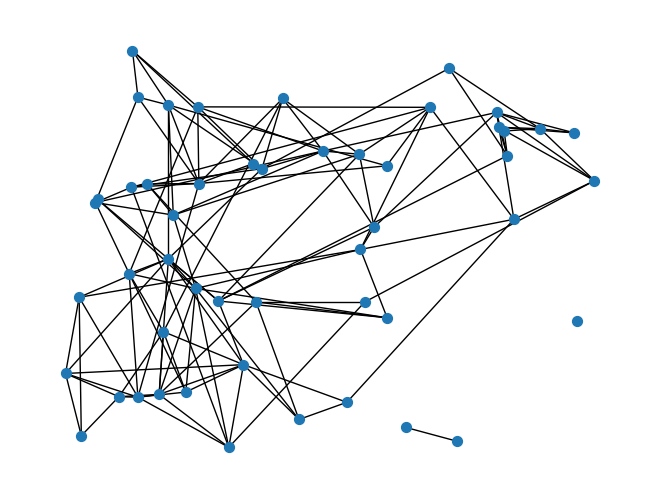

In [280]:
# Drawing a figure with these locations
nx.draw(G, node_size = 50, pos = node_locations)
plt.savefig(f'imgs/model_one/{n}-{rand_seed}-{base}.png')

Using the `model_one.py` file to test out multiple probability bases at once for different random seeds and different number of vertices, it seems that the base should somehow be related to the number of vertices. If we want an average degree between 5 and 5.5, see second sheet of the model one results excel or the presentation.